<a href="https://colab.research.google.com/github/songhyunsik/kuiotbigdata/blob/main/pytorch/kaggle_titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("/content/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
embarked_df = (
    data[['Embarked', 'Survived', 'PassengerId']]
    .dropna().groupby(["Embarked", "Survived"])
    .count().unstack()
    )

<Axes: xlabel='Embarked'>

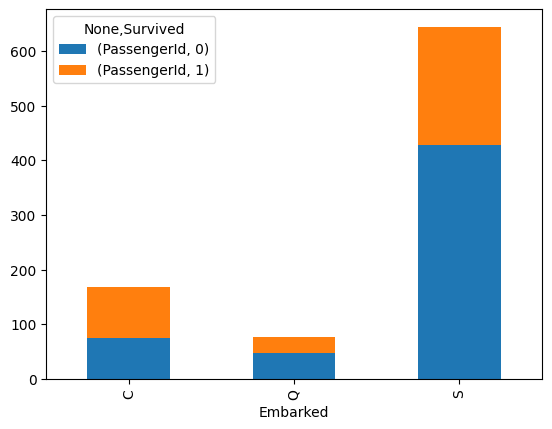

In [5]:
embarked_df.plot.bar(stacked=True)

In [6]:
embarked_df["Survived_rate"] = embarked_df.iloc[:, 1] / (
    embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1 ]
    )

In [7]:
embarked_df

PassengerId      Survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

In [8]:
sex_df = (
    data[['Sex', 'Survived', 'PassengerId']]
    .dropna().groupby(["Sex", "Survived"])
    .count().unstack()
)

In [9]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<Axes: xlabel='Sex'>

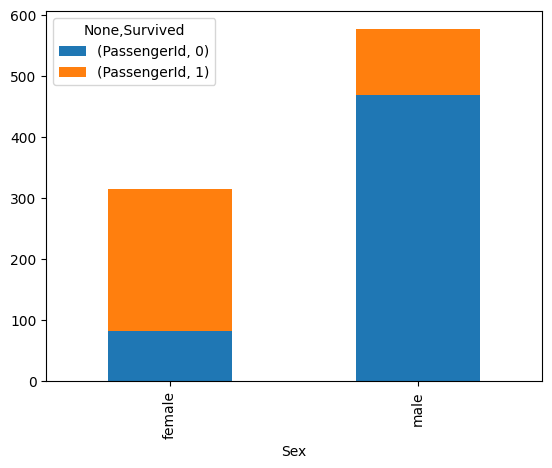

In [10]:
sex_df.plot.bar(stacked=True)

In [11]:
sex_df["Survived_rate"] = sex_df.iloc[:, 1] / (
    sex_df.iloc[:, 0] + sex_df.iloc[:, 1]
    )

In [12]:
sex_df

PassengerId      Survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

In [13]:
pClass_df = (
    data[['Pclass', 'Survived', 'PassengerId']]
    .dropna().groupby(["Pclass", "Survived"])
    .count().unstack()
)

<Axes: xlabel='Pclass'>

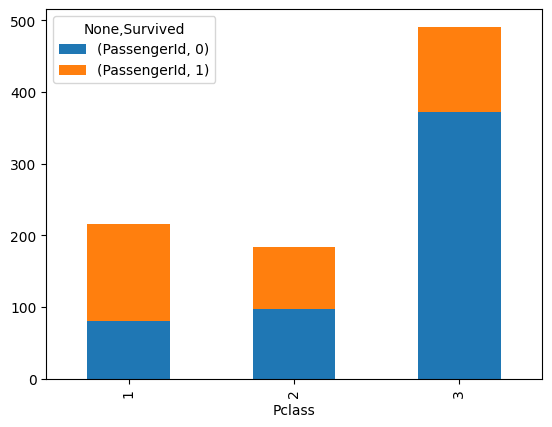

In [14]:
pClass_df.plot.bar(stacked=True)

In [15]:
pClass_df["Survived_rate"] = pClass_df.iloc[:, 1] / (
    pClass_df.iloc[:, 0] + pClass_df.iloc[:, 1]
    )


In [16]:
pClass_df

PassengerId      Survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363

(array([[ 26.,  71., 146.,  86.,  53.,  25.,  13.,   4.],
        [ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <a list of 2 BarContainer objects>)

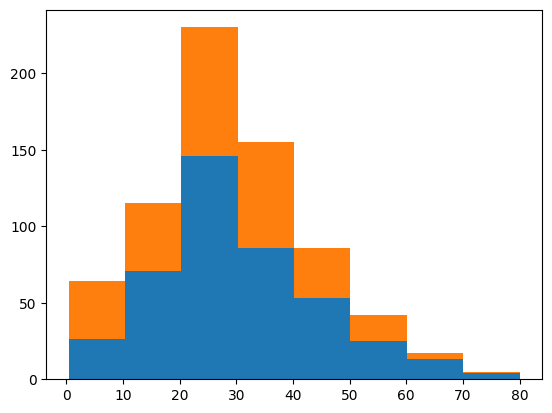

In [17]:
plt.hist(x=[data["Age"][data["Survived"]== 0], data["Age"][data["Survived"] == 1]],
         bins = 8,
         histtype='barstacked',
         label=["Dead", "Survived"])

In [18]:
data_df_corr = pd.get_dummies(data, columns=["Sex"], drop_first=True)
data_df_corr = pd.get_dummies(data_df_corr, columns=["Embarked"], drop_first=True)

In [21]:
data_df_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [23]:
data_df_corr.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
data_corr = data_df_corr.corr()

In [24]:
data_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


<Axes: >

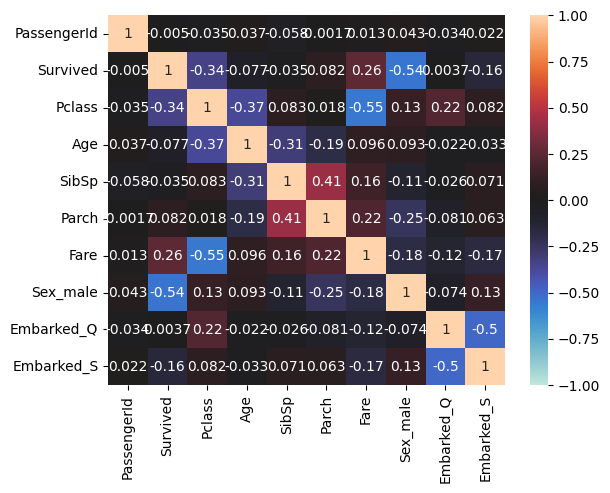

In [25]:
sns.heatmap(data_corr, vmax=1, vmin=-1, center=0, annot=True)